In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer , KNNImputer, IterativeImputer, MissingIndicator

In [3]:
df = pd.read_csv('real_estatesv8.csv')

In [4]:
df.head()

,property_type,bhk,price,price_per_sqft,super_built_up_area,carpet_area,bedroom,bathroom,balconies,status,transaction_type,furnished_status,address,facing,floorNum,society,additional_room,amenities,localities,regions,lats,longs,link,luxury_score
0,flat,3-bhk-1377-sq-ft-multistorey-apartment-for-sal...,0.52,4333.0,NaN,1200.0,3.0,2.0,NaN,ready to move,resale,unfurnished,Kammasandra Main Road Shree Ananth Nagar Layou...,north,4.0,NaN,NaN,NaN,electronic city phase 2,bangalore,12.839136,77.698975,https://www.magicbricks.com/propertyDetails/3-...,NaN
1,flat,3-bhk-1608-sq-ft-multistorey-apartment-for-sal...,1.64,12753.0,1608.0,1286.0,3.0,3.0,NaN,under construction,new property,unfurnished,"Sarjapur Road, Bangalore - South, Karnataka",NaN,NaN,dsr the address,NaN,"['pool with temperature control', 'golf course...",sarjapur road,bangalore,12.912350,77.680996,https://www.magicbricks.com/propertyDetails/3-...,26.85
2,flat,2-bhk-1417-sq-ft-multistorey-apartment-for-sal...,1.41,14915.0,NaN,952.0,2.0,2.0,2.0,ready to move,new property,unfurnished,"Begur - Koppa Rd, Suraksha nagar, Yelenahalli,...",west,4.0,NaN,NaN,NaN,begur hulimavu road,bangalore,12.865125,77.621071,https://www.magicbricks.com/propertyDetails/2-...,NaN
3,flat,3-bhk-1410-sq-ft-multistorey-apartment-for-sal...,0.67,5940.0,1410.0,1128.0,3.0,2.0,NaN,ready to move,new property,unfurnished,"Electronic City, Bangalore, Electronics City P...",east,1.0,sri sai nandana royal,NaN,NaN,electronics city phase 1,bangalore,12.833951,77.675366,https://www.magicbricks.com/propertyDetails/3-...,NaN
4,villa,3-bhk-1200-sq-ft-villa-for-sale-chandapura-in-...,1.05,10938.0,1200.0,960.0,3.0,3.0,2.0,ready to move,new property,unfurnished,"Jigani, Chandapura, Bangalore - South, Karnataka",east,NaN,NaN,1 study room,NaN,chandapura,bangalore,12.798481,77.713809,https://www.magicbricks.com/propertyDetails/3-...,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18218 entries, 0 to 18217
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        18218 non-null  object 
 1   bhk                  18218 non-null  object 
 2   price                18218 non-null  float64
 3   price_per_sqft       18218 non-null  float64
 4   super_built_up_area  6478 non-null   float64
 5   carpet_area          18218 non-null  float64
 6   bedroom              18179 non-null  float64
 7   bathroom             17576 non-null  float64
 8   balconies            8465 non-null   float64
 9   status               15544 non-null  object 
 10  transaction_type     18211 non-null  object 
 11  furnished_status     16534 non-null  object 
 12  address              18218 non-null  object 
 13  facing               10524 non-null  object 
 14  floorNum             15525 non-null  float64
 15  society              11755 non-null 

## Bedroom

In [11]:
temp_df = df[df['bedroom'].isnull()]
temp_df

,property_type,bhk,price,price_per_sqft,super_built_up_area,carpet_area,bedroom,bathroom,balconies,status,transaction_type,furnished_status,address,facing,floorNum,society,additional_room,amenities,localities,regions,lats,longs,link,luxury_score
1985,flat,2-bhk-1285-sq-ft-multistorey-apartment-for-sal...,1.50,14286.0,NaN,1050.0,NaN,NaN,NaN,ready to move,resale,semi-furnished,"Brookfield, Kundalahalli Road, Bangalore., Kun...",south,1.0,sjr brooklyn,NaN,"['power back up', 'lift', 'rain water harvesti...",kundalahalli,bangalore,12.971722,77.713223,https://www.magicbricks.com/propertyDetails/2-...,8.56
2002,villa,3-bhk-2400-sq-ft-villa-for-sale-horamavu-in-ba...,4.39,18333.0,NaN,2400.0,NaN,NaN,NaN,ready to move,resale,unfurnished,"prestige Augusta Golf village, Horamavu, Banga...",north,NaN,NaN,1 store room,"['power back up', 'jogging and strolling track...",horamavu,bangalore,13.032045,77.661594,https://www.magicbricks.com/propertyDetails/3-...,30.56
2015,villa,4-bhk-4300-sq-ft-villa-for-sale-rajanukunte-in...,7.00,18919.0,NaN,3700.0,NaN,NaN,NaN,ready to move,resale,semi-furnished,"Prestige Oasis, Rajanukunte, Bangalore - North...",east,NaN,NaN,1 study room,"['power back up', 'internet/wi-fi connectivity...",rajanukunte,bangalore,13.176195,77.552132,https://www.magicbricks.com/propertyDetails/4-...,23.61
5322,flat,3-bhk-1869-sq-ft-multistorey-apartment-for-sal...,4.50,34404.0,NaN,1308.0,NaN,NaN,NaN,ready to move,resale,semi-furnished,"Sector 48, Gurgaon, Sector 48, Gurgaon, Delhi NCR",east,5.0,central park 2,NaN,"['fire fighting equipment', 'guest accommodati...",sector 48,gurgaon,28.414920,77.035907,https://www.magicbricks.com/propertyDetails/3-...,40.51
5384,flat,4-bhk-1968-sq-ft-multistorey-apartment-for-sal...,2.09,13933.0,NaN,1500.0,NaN,NaN,NaN,ready to move,new property,semi-furnished,"Sector 92, Gurgaon, Sector 92, Gurgaon, Delhi NCR",north-east,2.0,dlf garden city floors,NaN,"['power back up', 'club house', 'swimming pool...",sector 92,gurgaon,28.409611,76.914194,https://www.magicbricks.com/propertyDetails/4-...,8.10
5563,flat,5-bhk-8087-sq-ft-multistorey-apartment-for-sal...,18.50,28740.0,NaN,6437.0,NaN,NaN,NaN,ready to move,resale,unfurnished,"Sector 24, Gurgaon, Delhi NCR",east,1.0,ambience caitriona,1 store room,"['golf course', 'power back up', 'piped gas', ...",sector 24,gurgaon,28.494107,77.100351,https://www.magicbricks.com/propertyDetails/5-...,23.84
5564,villa,3-bhk-3700-sq-ft-villa-for-sale-sector-57-bloc...,6.00,17143.0,NaN,3500.0,NaN,NaN,NaN,ready to move,resale,semi-furnished,"0000., Sector 57 Block G, Gurgaon, Delhi NCR",east,NaN,NaN,1 store room,"['club house', 'park', 'security', 'water stor...",sector 57 block g,gurgaon,28.424733,77.074368,https://www.magicbricks.com/propertyDetails/3-...,7.18
5610,flat,3-bhk-2048-sq-ft-multistorey-apartment-for-sal...,3.00,18750.0,2048.0,1600.0,NaN,NaN,NaN,ready to move,resale,semi-furnished,"Sector 110A, Gurgaon, Delhi NCR",north-east,2.0,mahindra aura,1 store room,"['fire fighting equipment', 'guest accommodati...",sector 110a,gurgaon,28.513139,77.025952,https://www.magicbricks.com/propertyDetails/3-...,39.58
5886,flat,4-bhk-3470-sq-ft-multistorey-apartment-for-sal...,4.75,19792.0,NaN,2400.0,NaN,NaN,NaN,ready to move,resale,NaN,"Bestech Park View Grand Spa, 81, Gurgaon, Sect...",north-east,11.0,park view grand spa,1 servant room,"['mini cinema theatre', 'aerobics room', 'even...",sector 81,gurgaon,28.388474,76.947084,https://www.magicbricks.com/propertyDetails/4-...,27.08
6611,flat,2-bhk-1200-sq-ft-multistorey-apartment-for-sal...,1.85,18500.0,NaN,1000.0,NaN,NaN,NaN,ready to move,resale,NaN,"Fc2 shopping centre dda flats munirka., Munirk...",north-east,1.0,dda flats munirka,1 store room,"['power back up', 'lift', 'rain water harvesti...",munirka,new delhi,28.552561,77.173608,https://www.magicbricks.com/propertyDetails/2-...,8.56


In [16]:
bedroom_value = temp_df['bhk'].str.split('-').str.get(0).astype(int)

In [17]:
df.loc[bedroom_value.index, 'bedroom'] = bedroom_value

In [18]:
df[df['regions'] == 'mumbai']

,property_type,bhk,price,price_per_sqft,super_built_up_area,carpet_area,bedroom,bathroom,balconies,status,transaction_type,furnished_status,address,facing,floorNum,society,additional_room,amenities,localities,regions,lats,longs,link,luxury_score
10786,flat,3-bhk-1036-sq-ft-multistorey-apartment-for-sal...,3.45,33301.0,NaN,1036.0,3.0,3.0,NaN,under construction,new property,unfurnished,"Goregaon West, Mumbai - Western Mumbai, Mahara...",NaN,NaN,sunteck city 4th avenue,NaN,"['power back up', 'lift', 'rain water harvesti...",goregaon west,mumbai,12.940645,77.751012,https://www.magicbricks.com/propertyDetails/3-...,8.56
10787,flat,2-bhk-946-sq-ft-multistorey-apartment-for-sale...,3.25,44643.0,NaN,728.0,2.0,2.0,NaN,ready to move,resale,semi-furnished,"Powai, Mumbai, Powai, Mumbai - Central Mumbai,...",east,19.0,kanakia silicon valley,NaN,"['power back up', 'lift', 'rain water harvesti...",powai,mumbai,19.119677,72.905081,https://www.magicbricks.com/propertyDetails/2-...,8.56
10788,flat,6-bhk-3270-sq-ft-multistorey-apartment-for-sal...,10.00,37453.0,NaN,2670.0,6.0,6.0,2.0,ready to move,resale,unfurnished,"Borivali East, Borivali East, Mumbai - Western...",west,59.0,oberoi sky city,NaN,"['fire fighting equipment', 'aerobics room', '...",borivali east,mumbai,19.227262,72.863440,https://www.magicbricks.com/propertyDetails/6-...,34.49
10789,flat,3-bhk-821-sq-ft-multistorey-apartment-for-sale...,2.80,34105.0,NaN,821.0,3.0,3.0,NaN,ready to move,resale,furnished,Vidya Niketan Marg off mg road Goregaon West M...,west,7.0,kabra christina,NaN,"['power back up', 'lift', 'rain water harvesti...",goregaon west,mumbai,19.153662,72.842659,https://www.magicbricks.com/propertyDetails/3-...,6.48
10790,flat,4-bhk-1800-sq-ft-multistorey-apartment-for-sal...,5.80,36250.0,NaN,1600.0,4.0,5.0,NaN,ready to move,resale,NaN,"Malad West, Mumbai, Malad West, Mumbai - Weste...",north-east,25.0,transcon auris serenity,1 store room,"['grand entrance lobby', 'health club with ste...",malad west,mumbai,19.191803,72.835092,https://www.magicbricks.com/propertyDetails/4-...,32.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12179,flat,3-bhk-1510-sq-ft-multistorey-apartment-for-sal...,2.85,26219.0,NaN,1087.0,3.0,3.0,NaN,ready to move,resale,unfurnished,"Bal Rajeshwar Marg, Vaishali Nagar, Mulund Wes...",NaN,16.0,tirumala habitats,NaN,"['fire fighting equipment', 'indoor games room...",mulund west,mumbai,19.185237,72.948758,https://www.magicbricks.com/propertyDetails/3-...,41.67
12180,flat,3-bhk-1510-sq-ft-multistorey-apartment-for-sal...,2.65,24379.0,NaN,1087.0,3.0,3.0,NaN,ready to move,resale,unfurnished,"Bal Rajeshwar Marg, Vaishali Nagar, Mulund Wes...",NaN,19.0,tirumala habitats,NaN,"['fire fighting equipment', 'indoor games room...",mulund west,mumbai,19.185237,72.948758,https://www.magicbricks.com/propertyDetails/3-...,41.67
12181,flat,2-bhk-1245-sq-ft-multistorey-apartment-for-sal...,3.50,39063.0,NaN,896.0,2.0,2.0,NaN,ready to move,resale,unfurnished,"Bal Rajeshwar Marg, Vaishali Nagar, Mulund Wes...",NaN,11.0,tirumala habitats,NaN,"['fire fighting equipment', 'indoor games room...",mulund west,mumbai,19.185237,72.948758,https://www.magicbricks.com/propertyDetails/2-...,41.67
12182,flat,3-bhk-1510-sq-ft-multistorey-apartment-for-sal...,3.00,27599.0,NaN,1087.0,3.0,3.0,NaN,ready to move,resale,semi-furnished,"Bal Rajeshwar Marg, Vaishali Nagar, Mulund Wes...",NaN,30.0,tirumala habitats,NaN,"['fire fighting equipment', 'indoor games room...",mulund west,mumbai,19.185237,72.948758,https://www.magicbricks.com/propertyDetails/3-...,41.67


## bathroom

In [130]:
bath = df[df['bathroom'].isnull()]

In [39]:
bath['price'].describe()

count    642.000000
mean       2.048427
std        4.012697
min        0.250000
25%        0.422500
50%        0.750000
75%        2.242500
max       50.000000
Name: price, dtype: float64

In [27]:
df.groupby(['property_type','bedroom','regions'])['bathroom'].median().reset_index().pivot_table(index='regions', columns=['bedroom'], values='bathroom', aggfunc='median')

bedroom,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
regions,,,,,,,,,
bangalore,2.0,3.0,4.0,5.0,5.25,6.75,7.50,8.75,9.5
beyond thane,2.0,3.0,3.5,4.0,6.00,2.00,NaN,NaN,NaN
greater noida,2.0,3.0,4.0,5.0,4.25,6.00,5.25,9.00,10.0
gurgaon,2.0,3.0,4.0,5.0,7.00,5.00,9.00,9.00,10.0
mumbai,2.0,3.0,4.0,5.0,6.00,6.75,NaN,NaN,NaN
navi mumbai,2.0,3.0,4.0,5.0,NaN,NaN,NaN,NaN,NaN
new delhi,2.0,3.0,4.0,4.0,4.75,5.50,5.50,6.00,5.0
noida,2.0,3.0,4.0,5.0,6.00,7.00,8.00,7.50,9.0
pune,2.0,3.0,4.0,4.5,5.00,NaN,8.00,NaN,NaN


In [40]:
df1 = df[(df['bedroom'] == 3) & (df['bathroom'] == 2)]

In [53]:
bath['bedroom'].value_counts()

bedroom
2.0     415
3.0      94
10.0     88
4.0      22
9.0       8
5.0       5
8.0       5
6.0       3
7.0       2
Name: count, dtype: int64

In [43]:
df1.groupby('regions')['price'].median()

regions
bangalore        1.250
beyond thane     0.785
greater noida    0.930
gurgaon          1.300
mumbai           3.215
navi mumbai      1.400
new delhi        1.200
noida            1.210
pune             0.960
thane            1.675
Name: price, dtype: float64

In [57]:
df[(df['bedroom'].isin([2,3])) & (df['bathroom'].isin([4,5,8,9,7,6,10]))].sort_values('bathroom', ascending=False)

,property_type,bhk,price,price_per_sqft,super_built_up_area,carpet_area,bedroom,bathroom,balconies,status,transaction_type,furnished_status,address,facing,floorNum,society,additional_room,amenities,localities,regions,lats,longs,link,luxury_score
16927,residential,2-bhk-5200-sq-ft-residential-house-for-sale-bt...,3.25,27083.0,NaN,1200.0,2.0,10.0,NaN,ready to move,resale,semi-furnished,"near to gangotri circle, BTM Layout Stage 2, B...",north-west,NaN,NaN,NaN,NaN,btm layout stage 2,bangalore,12.911800,77.607424,https://www.magicbricks.com/propertyDetails/2-...,NaN
15371,residential,3-bhk-5600-sq-ft-residential-house-for-sale-th...,2.40,4286.0,NaN,5600.0,3.0,9.0,6.0,ready to move,new property,furnished,"Thanisandra, Bangalore - North, Karnataka",north,4.0,NaN,NaN,NaN,thanisandra,bangalore,13.058203,77.621025,https://www.magicbricks.com/propertyDetails/3-...,NaN
994,residential,2-bhk-1200-sq-ft-residential-house-for-sale-el...,2.00,16667.0,NaN,1200.0,2.0,9.0,NaN,ready to move,resale,furnished,"Electronic City, Bangalore - South, Karnataka",NaN,NaN,NaN,NaN,NaN,electronic city,bangalore,12.833951,77.675366,https://www.magicbricks.com/propertyDetails/2-...,NaN
9097,flat,3-bhk-1795-sq-ft-multistorey-apartment-for-sal...,1.95,14338.0,1795.0,1360.0,3.0,8.0,NaN,NaN,resale,furnished,"D16., Sector 74, Noida - Rest of Noida, Delhi NCR",NaN,8.0,ajnara klock tower,NaN,"['lift', 'internet/wi-fi connectivity', 'waste...",sector 74,noida,28.572416,77.391258,https://www.magicbricks.com/propertyDetails/3-...,19.68
15898,flat,2-bhk-1050-sq-ft-multistorey-apartment-for-sal...,3.00,28571.0,NaN,1050.0,2.0,8.0,3.0,ready to move,resale,unfurnished,"jaladarshini Layout, Sanjayanagara, Bangalore ...",east,4.0,NaN,1 store room,NaN,sanjayanagara,bangalore,13.034762,77.582130,https://www.magicbricks.com/propertyDetails/2-...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6139,flat,3-bhk-2650-sq-ft-multistorey-apartment-for-sal...,3.97,22624.0,NaN,1757.0,3.0,4.0,4.0,ready to move,resale,semi-furnished,"T2 1802., Garauli Khurd, Gurgaon, Delhi NCR",NaN,18.0,signature global city 37d,NaN,"['power back up', 'club house', 'swimming pool...",garauli khurd,gurgaon,28.447189,76.971720,https://www.magicbricks.com/propertyDetails/3-...,9.26
6140,flat,3-bhk-3514-sq-ft-multistorey-apartment-for-sal...,8.25,23478.0,NaN,3514.0,3.0,4.0,4.0,ready to move,resale,semi-furnished,"Sector 53, Gurgaon, Delhi NCR",NaN,3.0,parsvnath exotica phase 4,1 store room,NaN,sector 53,gurgaon,28.440675,77.096631,https://www.magicbricks.com/propertyDetails/3-...,NaN
6154,flat,3-bhk-2300-sq-ft-multistorey-apartment-for-sal...,1.75,9738.0,2300.0,1797.0,3.0,4.0,NaN,ready to move,resale,semi-furnished,"The Lions CGHS, Sector 56, Gurugram, Sector 56...",NaN,4.0,lions society,NaN,"['power back up', 'park', 'reserved parking', ...",sector 56,gurgaon,28.431353,77.094179,https://www.magicbricks.com/propertyDetails/3-...,5.09
6224,flat,3-bhk-1565-sq-ft-multistorey-apartment-for-sal...,1.48,12101.0,1565.0,1223.0,3.0,4.0,3.0,NaN,resale,unfurnished,"Sector 70, Gurgaon, Delhi NCR",east,11.0,unitech vistas,1 servant room,"['power back up', 'internet/wi-fi connectivity...",sector 70,gurgaon,28.397495,77.022815,https://www.magicbricks.com/propertyDetails/3-...,27.08


In [131]:
df.drop(df[(df['bedroom'].isin([2,3])) & (df['bathroom'].isin([8,9,7,6,10]))].index, inplace=True)

In [50]:
df[(df['bedroom'] == 2) & (df['bathroom'].isin([2,3]))][['price','property_type','bedroom','bathroom','regions']]

,price,property_type,bedroom,bathroom,regions
2,1.41,flat,2.0,2.0,bangalore
8,1.32,flat,2.0,2.0,bangalore
12,0.60,flat,2.0,2.0,bangalore
13,1.23,flat,2.0,2.0,bangalore
18,1.01,flat,2.0,2.0,bangalore
...,...,...,...,...,...
18206,0.62,flat,2.0,2.0,bangalore
18207,0.39,flat,2.0,2.0,bangalore
18209,0.84,flat,2.0,2.0,bangalore
18210,0.63,flat,2.0,2.0,bangalore


In [51]:
df[(df['bedroom'] == 2) & (df['bathroom'] == 3)]

,property_type,bhk,price,price_per_sqft,super_built_up_area,carpet_area,bedroom,bathroom,balconies,status,transaction_type,furnished_status,address,facing,floorNum,society,additional_room,amenities,localities,regions,lats,longs,link,luxury_score
1876,villa,2-bhk-2600-sq-ft-villa-for-sale-in-bangalore,1.10,4400.0,NaN,2500.0,2.0,3.0,3.0,ready to move,resale,semi-furnished,"Doddagattiganabbe, Bangalore - Bangalore Rural...",north-east,NaN,NaN,1 store room,NaN,doddagattiganabbe,bangalore,13.028656,77.788495,https://www.magicbricks.com/propertyDetails/2-...,NaN
2289,flat,2-bhk-1385-sq-ft-multistorey-apartment-for-sal...,1.04,9386.0,1385.0,1108.0,2.0,3.0,NaN,ready to move,resale,unfurnished,"Ground Floor, Hennur Main Road, Bangalore - No...",NaN,0.0,mantri webcity,NaN,"['power back up', 'lift', 'rain water harvesti...",hennur main road,bangalore,13.073770,77.651210,https://www.magicbricks.com/propertyDetails/2-...,8.56
2515,flat,2-bhk-1172-sq-ft-multistorey-apartment-for-sal...,0.86,8650.0,NaN,1000.0,2.0,3.0,NaN,ready to move,resale,unfurnished,"Kalyan West, Kalyan West, Beyond Thane, Mahara...",north-east,3.0,godrej riverside chs,NaN,NaN,kalyan west,beyond thane,19.263677,73.143640,https://www.magicbricks.com/propertyDetails/2-...,NaN
2620,flat,2-bhk-680-sq-ft-multistorey-apartment-for-sale...,0.65,13265.0,NaN,490.0,2.0,3.0,NaN,ready to move,resale,unfurnished,"Shankheshwar Rd, Dombivli East, Dombivli, Maha...",NaN,6.0,sankeshwar garden,NaN,NaN,thakurli,beyond thane,19.223713,73.111363,https://www.magicbricks.com/propertyDetails/2-...,NaN
2643,flat,2-bhk-977-sq-ft-multistorey-apartment-for-sale...,0.68,9673.0,NaN,703.0,2.0,3.0,NaN,ready to move,resale,semi-furnished,"Shivaji Nagar Road, Kumbharkhan Pada, Dombivli...",NaN,5.0,shankeshwar palms,NaN,NaN,dombivli west,beyond thane,19.233379,73.089262,https://www.magicbricks.com/propertyDetails/2-...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17163,flat,2-bhk-1720-sq-ft-multistorey-apartment-for-sal...,2.35,17078.0,1720.0,1376.0,2.0,3.0,3.0,ready to move,resale,unfurnished,"S-23 Golden Enclave, Murgesh Pallya, HAL Old A...",east,2.0,india golden enclave apartments,1 store room,NaN,hal old airport road,bangalore,12.958333,77.651541,https://www.magicbricks.com/propertyDetails/2-...,NaN
17752,villa,2-bhk-1450-sq-ft-villa-for-sale-margondanahall...,1.15,9914.0,1450.0,1160.0,2.0,3.0,NaN,ready to move,resale,unfurnished,"Margondanahalli, Bangalore - East, Karnataka",NaN,NaN,NaN,NaN,NaN,margondanahalli,bangalore,13.039637,77.695592,https://www.magicbricks.com/propertyDetails/2-...,NaN
17758,residential,2-bhk-1200-sq-ft-residential-house-for-sale-pa...,1.00,8333.0,NaN,1200.0,2.0,3.0,NaN,ready to move,resale,semi-furnished,"Parvathinagar Medahalli, Bangalore - East, Kar...",east,0.0,NaN,1 study room,NaN,parvathinagar medahalli,bangalore,13.032991,77.716720,https://www.magicbricks.com/propertyDetails/2-...,NaN
17830,penthouse,2-bhk-2700-sq-ft-penthouse-for-sale-upkar-layo...,1.85,8565.0,2700.0,2160.0,2.0,3.0,NaN,ready to move,resale,NaN,"Upkar Layout Whitefield, Bangalore - East, Kar...",NaN,5.0,NaN,NaN,NaN,upkar layout whitefield,bangalore,12.984674,77.745629,https://www.magicbricks.com/propertyDetails/2-...,NaN


In [132]:
# 2 bedroom imputing bathroom
bath['bathroom'] = bath.apply(lambda x: 2 if x['bedroom'] == 2 else x['bathroom'], axis=1)

C:\Users\soura\AppData\Local\Temp\ipykernel_26024\1560936065.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath['bathroom'] = bath.apply(lambda x: 2 if x['bedroom'] == 2 else x['bathroom'], axis=1)


In [133]:
# 3 bedroom imputing bathroom
def bath_3(x):
  if x['bedroom'] == 3 and x['price'] >= 1:
    return 3
  elif x['bedroom'] == 3 and x['price'] < 1:
    return 2
  else:
    return x['bathroom']

bath['bathroom'] = bath.apply(lambda x: bath_3(x), axis=1)

C:\Users\soura\AppData\Local\Temp\ipykernel_26024\2527245755.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath['bathroom'] = bath.apply(lambda x: bath_3(x), axis=1)


In [82]:
# 4 bedroom imputing bathroom
bath[bath['bedroom'] == 4].sort_values('price')


,property_type,bhk,price,price_per_sqft,super_built_up_area,carpet_area,bedroom,bathroom,balconies,status,transaction_type,furnished_status,address,facing,floorNum,society,additional_room,amenities,localities,regions,lats,longs,link,luxury_score
16395,residential,4-bhk-750-sq-ft-residential-house-for-sale-kem...,0.65,10833.0,750.0,600.0,4.0,NaN,NaN,ready to move,resale,NaN,"Kempapura Agrahara, Bangalore - Central, Karna...",NaN,NaN,NaN,NaN,NaN,kempapura agrahara,bangalore,12.968570,77.550389,https://www.magicbricks.com/propertyDetails/4-...,NaN
7216,residential,4-bhk-900-sq-ft-residential-house-for-sale-utt...,0.82,9647.0,NaN,850.0,4.0,NaN,NaN,ready to move,resale,unfurnished,"Uttam nagar Hastsal vihar, Uttam Nagar, New De...",NaN,0.0,NaN,1 store room,NaN,uttam nagar,new delhi,28.634798,77.049095,https://www.magicbricks.com/propertyDetails/4-...,NaN
7466,builder-floor,4-bhk-1800-sq-ft-builder-floor-apartment-for-s...,1.00,7220.0,1800.0,1385.0,4.0,NaN,NaN,ready to move,resale,furnished,"Laxmi Nagar, New Delhi - East, Delhi NCR",NaN,-1.0,NaN,NaN,NaN,laxmi nagar,new delhi,28.635967,77.269562,https://www.magicbricks.com/propertyDetails/4-...,NaN
9160,villa,4-bhk-2000-sq-ft-villa-for-sale-in-noida,1.10,7261.0,2000.0,1515.0,4.0,NaN,NaN,ready to move,resale,NaN,"Noida, Delhi NCR",NaN,NaN,NaN,NaN,NaN,NaN,noida,NaN,NaN,https://www.magicbricks.com/propertyDetails/4-...,NaN
1184,builder-floor,4-bhk-600-sq-ft-builder-floor-apartment-for-sa...,1.15,20909.0,NaN,550.0,4.0,NaN,NaN,ready to move,resale,semi-furnished,"No.77, Anjanapura Township-5th G Block, Bangal...",west,2.0,NaN,NaN,NaN,anjanapura township-5th g block,bangalore,12.854105,77.559662,https://www.magicbricks.com/propertyDetails/4-...,NaN
16243,residential,4-bhk-2000-sq-ft-residential-house-for-sale-b-...,1.20,6486.0,NaN,1850.0,4.0,NaN,NaN,ready to move,resale,semi-furnished,"B Narayanapura, Bangalore - Central, Karnataka",NaN,0.0,NaN,NaN,NaN,b narayanapura,bangalore,12.971575,77.522331,https://www.magicbricks.com/propertyDetails/4-...,NaN
7915,builder-floor,4-bhk-1400-sq-ft-builder-floor-apartment-for-s...,1.40,12999.0,1400.0,1077.0,4.0,NaN,NaN,ready to move,resale,NaN,"Rohini, New Delhi - North, Delhi NCR",NaN,NaN,NaN,NaN,NaN,rohini,new delhi,28.739568,77.092769,https://www.magicbricks.com/propertyDetails/4-...,NaN
5384,flat,4-bhk-1968-sq-ft-multistorey-apartment-for-sal...,2.09,13933.0,NaN,1500.0,4,NaN,NaN,ready to move,new property,semi-furnished,"Sector 92, Gurgaon, Sector 92, Gurgaon, Delhi NCR",north-east,2.0,dlf garden city floors,NaN,"['power back up', 'club house', 'swimming pool...",sector 92,gurgaon,28.409611,76.914194,https://www.magicbricks.com/propertyDetails/4-...,8.10
16876,residential,4-bhk-1180-sq-ft-residential-house-for-sale-ma...,2.25,22500.0,NaN,1000.0,4.0,NaN,NaN,ready to move,resale,semi-furnished,building no 188 12th main road Manjunath nagar...,north,0.0,NaN,NaN,NaN,manjunath nagar basaveshwar nagar,bangalore,12.984517,77.539803,https://www.magicbricks.com/propertyDetails/4-...,NaN
8936,flat,4-bhk-2250-sq-ft-multistorey-apartment-for-sal...,2.25,11538.0,NaN,1950.0,4.0,NaN,2.0,ready to move,resale,furnished,"Sector 61, Noida - Central Noida, Delhi NCR",NaN,2.0,rwa sector 61,NaN,NaN,sector 61,noida,28.596738,77.364403,https://www.magicbricks.com/propertyDetails/4-...,NaN


In [79]:
df.drop([13104], inplace=True)

In [135]:
# drop some 4 bedroom with bathroom 7,8,9 which doesn't make sense
df.drop(df[(df['bedroom'] == 4) & (df['bathroom'].isin([7,8,9]))].index, inplace=True)

In [98]:
df[(df['bedroom'] == 4)].groupby(['property_type', 'bathroom'], as_index=False)['price'].median().pivot_table(index='property_type', columns='bathroom', values='price', aggfunc='median')

bathroom,2.0,3.0,4.0,5.0,6.0
property_type,,,,,
builder-floor,1.725,2.400,4.50,5.995,5.025
flat,2.025,2.650,4.00,5.575,7.655
penthouse,NaN,2.100,4.25,3.600,10.505
residential,1.350,2.400,1.85,3.500,2.500
villa,0.840,1.065,3.59,5.500,3.350


In [136]:
# imputing 4 bedroom 
def bedroom_4(x):
    if x['bedroom'] == 4 :
       
            if x['price'] <= 2:
                return 2
            
            elif (x['price'] <= 3) and (x['price'] > 2):
                return 3
            
            elif (x['price'] <= 4) and (x['price'] > 3):
                return 4
            
            elif (x['price'] <= 5) and (x['price'] > 4):
                return 5
            
            else:           
                return 6
        
    else:
        return x['bathroom']



bath['bathroom'] = bath.apply(lambda x: bedroom_4(x),axis=1 )          
            
        

C:\Users\soura\AppData\Local\Temp\ipykernel_26024\1313122701.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath['bathroom'] = bath.apply(lambda x: bedroom_4(x),axis=1 )


In [108]:
bath1 = bath[bath['bathroom'].isnull()]
bath1['bedroom'].value_counts()

bedroom
10.0    88
9.0      8
5.0      5
8.0      5
6.0      3
7.0      2
Name: count, dtype: int64

In [121]:
df[(df['bedroom'] == 10)].groupby(['property_type', 'bedroom','bathroom'], as_index=False)['price'].median()

,property_type,bedroom,bathroom,price
0,builder-floor,10.0,6.0,3.25
1,builder-floor,10.0,10.0,3.50
2,flat,10.0,2.0,0.72
3,flat,10.0,7.0,5.00
4,residential,10.0,3.0,2.40
5,residential,10.0,4.0,6.05
6,residential,10.0,5.0,2.50
7,residential,10.0,6.0,2.50
8,residential,10.0,7.0,21.25
9,residential,10.0,8.0,2.50


In [137]:
import random
def bedroom_greater_than_4(x):
    if x['bedroom'] == 10:
        if x['property_type'] == 'builder-floor':
            if x['price'] <= 3.5:
                return 6
            
            elif (x['price'] <= 5) and (x['price'] > 3.5):
                return 7
            
            elif (x['price'] <= 6) and (x['price'] > 5):
                return 8
            
            else:
                return random.choice([9,10])
            
        elif x['property_type'] == 'flat':
            if x['price'] <= 3.5:
                return 6
            elif (x['price'] <= 5) and (x['price'] > 3.5):
                return 7
            
            elif (x['price'] <= 6) and (x['price'] > 5):
                return 8
            
            else:
                return random.choice([9,10])
                
            
        
        elif x['property_type'] == 'villa':
            if x['price'] <= 3:
                return 3
            
            elif (x['price'] <= 3) and (x['price'] > 2):
                return 4
            
            elif (x['price'] <= 4) and (x['price'] > 3):
                return 5
            
            elif (x['price'] <= 5) and (x['price'] > 4):
                return 6
            
            elif (x['price'] <= 6) and (x['price'] > 5):
                return 7
            
            else:
                return random.choice([9,10])
        
        
        else:
            if x['price'] <= 2:
                return 3
            
            elif (x['price'] <= 2.3) and (x['price'] > 2):
                return 4
            
            elif (x['price'] <= 2.5) and (x['price'] > 2.3):
                return 5
            
            elif (x['price'] <= 2.7) and (x['price'] > 2.5):
                return 6
            
            elif (x['price'] <=2.9) and (x['price'] > 2.7):
                return 7
            
            elif (x['price'] <=3.1) and (x['price'] > 2.9):
                return 8
            
            else:
                return 10 
    else:
        return x['bathroom']       
            
            
bath['bathroom'] = bath.apply(lambda x: bedroom_greater_than_4(x),axis=1 )    

C:\Users\soura\AppData\Local\Temp\ipykernel_26024\2683443501.py:76: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath['bathroom'] = bath.apply(lambda x: bedroom_greater_than_4(x),axis=1 )


In [138]:
bath

,property_type,bhk,price,price_per_sqft,super_built_up_area,carpet_area,bedroom,bathroom,balconies,status,transaction_type,furnished_status,address,facing,floorNum,society,additional_room,amenities,localities,regions,lats,longs,link,luxury_score
53,flat,2-bhk-995-sq-ft-multistorey-apartment-for-sale...,0.72,10176.0,NaN,704.0,2.0,2.0,NaN,NaN,new property,unfurnished,"TG Heritage, Holiday village rd, Kanakapura Rd...",east,0.0,tg heritage,NaN,"['power back up', 'lift', 'rain water harvesti...",vajarahalli,bangalore,12.867165,77.542208,https://www.magicbricks.com/propertyDetails/2-...,8.56
111,residential,2-bhk-800-sq-ft-residential-house-for-sale-ava...,0.60,9231.0,NaN,650.0,2.0,2.0,NaN,ready to move,new property,unfurnished,"House No 22, Avalahalli, Bangalore - South, Ka...",east,1.0,NaN,NaN,NaN,avalahalli,bangalore,12.877527,77.706753,https://www.magicbricks.com/propertyDetails/2-...,NaN
152,residential,10-plus-bhk-2280-sq-ft-residential-house-for-s...,2.25,11250.0,NaN,2000.0,10.0,4.0,2.0,ready to move,resale,semi-furnished,No 437 Aiswarya Golden Nest Layout East Block ...,east,0.0,NaN,NaN,NaN,bannerghatta,bangalore,12.963387,77.548409,https://www.magicbricks.com/propertyDetails/10...,NaN
259,flat,3-bhk-1698-sq-ft-multistorey-apartment-for-sal...,1.60,11782.0,1698.0,1358.0,3.0,3.0,NaN,ready to move,resale,NaN,"Godrej Eternity Life Tower E1, 102, Mallasandr...",east,1.0,godrej life plus,NaN,"['mini cinema theatre', 'golf course', 'lift',...",kanakapura road,bangalore,12.550848,77.423927,https://www.magicbricks.com/propertyDetails/3-...,15.74
334,residential,2-bhk-620-sq-ft-residential-house-for-sale-kud...,0.45,7258.0,NaN,620.0,2.0,2.0,NaN,ready to move,resale,unfurnished,"Maggada Layout kudlu singasandra, Kudlu Gate, ...",east,1.0,NaN,NaN,NaN,kudlu gate,bangalore,12.890923,77.640182,https://www.magicbricks.com/propertyDetails/2-...,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17936,flat,2-bhk-1185-sq-ft-multistorey-apartment-for-sal...,1.25,13186.0,1185.0,948.0,2.0,2.0,NaN,ready to move,resale,NaN,"Thubarahalli, Bangalore - East, Karnataka",NaN,NaN,keerthi gardenia,NaN,"['power back up', 'lift', 'club house', 'swimm...",thubarahalli,bangalore,12.946742,77.717425,https://www.magicbricks.com/propertyDetails/2-...,8.10
17996,flat,2-bhk-724-sq-ft-multistorey-apartment-for-sale...,0.60,10363.0,724.0,579.0,2.0,2.0,NaN,ready to move,resale,unfurnished,"101, KR Puram, Bangalore - East, Karnataka",north-west,1.0,casagrand luxus,NaN,"['power back up', 'lift', 'club house', 'swimm...",kr puram,bangalore,13.006432,77.726011,https://www.magicbricks.com/propertyDetails/2-...,9.03
18145,flat,2-bhk-706-sq-ft-multistorey-apartment-for-sale...,0.80,11331.0,NaN,706.0,2.0,2.0,NaN,ready to move,resale,unfurnished,"Hennur, Bangalore - East, Karnataka",east,6.0,rohan upavan,NaN,"['swimming pool', 'gymnasium', 'bar/lounge', '...",hennur,bangalore,13.012519,77.625792,https://www.magicbricks.com/propertyDetails/2-...,10.42
18163,flat,2-bhk-847-sq-ft-multistorey-apartment-for-sale...,0.69,10177.0,847.0,678.0,2.0,2.0,NaN,ready to move,resale,unfurnished,"Whitefield, Whitefield, Bangalore - East, Karn...",east,0.0,ds max sangam grand,NaN,"['lift', 'club house', 'swimming pool', 'gymna...",whitefield,bangalore,13.007067,77.762791,https://www.magicbricks.com/propertyDetails/2-...,9.95


In [119]:
import random
random.choice([2,3])

2

In [139]:
bath1 = bath[bath['bathroom'].isnull()]
bath1['bedroom'].value_counts()

bedroom
9.0    8
5.0    5
8.0    5
6.0    3
7.0    2
Name: count, dtype: int64

In [142]:
df.drop(bath1.index, inplace=True)

In [145]:
bath.drop(bath1.index, inplace=True)

C:\Users\soura\AppData\Local\Temp\ipykernel_26024\3076318081.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bath.drop(bath1.index, inplace=True)


In [146]:
df.loc[bath.index, 'bathroom'] = bath['bathroom']

In [148]:
df.to_csv('imputed_real_estate_v1.csv', index=False)

In [2]:
import missingno as msno

In [3]:
df1 = pd.read_csv('imputed_real_estate_v1.csv')

In [4]:
df1.head()

,property_type,bhk,price,price_per_sqft,super_built_up_area,carpet_area,bedroom,bathroom,balconies,status,...,floorNum,society,additional_room,amenities,localities,regions,lats,longs,link,luxury_score
0,flat,3-bhk-1377-sq-ft-multistorey-apartment-for-sal...,0.52,4333.0,NaN,1200.0,3.0,2.0,NaN,ready to move,...,4.0,NaN,NaN,NaN,electronic city phase 2,bangalore,12.839136,77.698975,https://www.magicbricks.com/propertyDetails/3-...,NaN
1,flat,3-bhk-1608-sq-ft-multistorey-apartment-for-sal...,1.64,12753.0,1608.0,1286.0,3.0,3.0,NaN,under construction,...,NaN,dsr the address,NaN,"['pool with temperature control', 'golf course...",sarjapur road,bangalore,12.912350,77.680996,https://www.magicbricks.com/propertyDetails/3-...,26.85
2,flat,2-bhk-1417-sq-ft-multistorey-apartment-for-sal...,1.41,14915.0,NaN,952.0,2.0,2.0,2.0,ready to move,...,4.0,NaN,NaN,NaN,begur hulimavu road,bangalore,12.865125,77.621071,https://www.magicbricks.com/propertyDetails/2-...,NaN
3,flat,3-bhk-1410-sq-ft-multistorey-apartment-for-sal...,0.67,5940.0,1410.0,1128.0,3.0,2.0,NaN,ready to move,...,1.0,sri sai nandana royal,NaN,NaN,electronics city phase 1,bangalore,12.833951,77.675366,https://www.magicbricks.com/propertyDetails/3-...,NaN
4,villa,3-bhk-1200-sq-ft-villa-for-sale-chandapura-in-...,1.05,10938.0,1200.0,960.0,3.0,3.0,2.0,ready to move,...,NaN,NaN,1 study room,NaN,chandapura,bangalore,12.798481,77.713809,https://www.magicbricks.com/propertyDetails/3-...,NaN


In [5]:
df = df1.copy()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18174 entries, 0 to 18173
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        18174 non-null  object 
 1   bhk                  18174 non-null  object 
 2   price                18174 non-null  float64
 3   price_per_sqft       18174 non-null  float64
 4   super_built_up_area  6458 non-null   float64
 5   carpet_area          18174 non-null  float64
 6   bedroom              18174 non-null  float64
 7   bathroom             18174 non-null  float64
 8   balconies            8445 non-null   float64
 9   status               15506 non-null  object 
 10  transaction_type     18167 non-null  object 
 11  furnished_status     16498 non-null  object 
 12  address              18174 non-null  object 
 13  facing               10503 non-null  object 
 14  floorNum             15506 non-null  float64
 15  society              11749 non-null 

In [7]:
df.isnull().sum()/df.shape[0]*100

property_type           0.000000
bhk                     0.000000
price                   0.000000
price_per_sqft          0.000000
super_built_up_area    64.465720
carpet_area             0.000000
bedroom                 0.000000
bathroom                0.000000
balconies              53.532519
status                 14.680313
transaction_type        0.038517
furnished_status        9.221965
address                 0.000000
facing                 42.208650
floorNum               14.680313
society                35.352702
additional_room        74.336965
amenities              48.013646
localities              2.068890
regions                 0.000000
lats                    1.909321
longs                   1.909321
link                    0.000000
luxury_score           48.013646
dtype: float64

<Axes: >

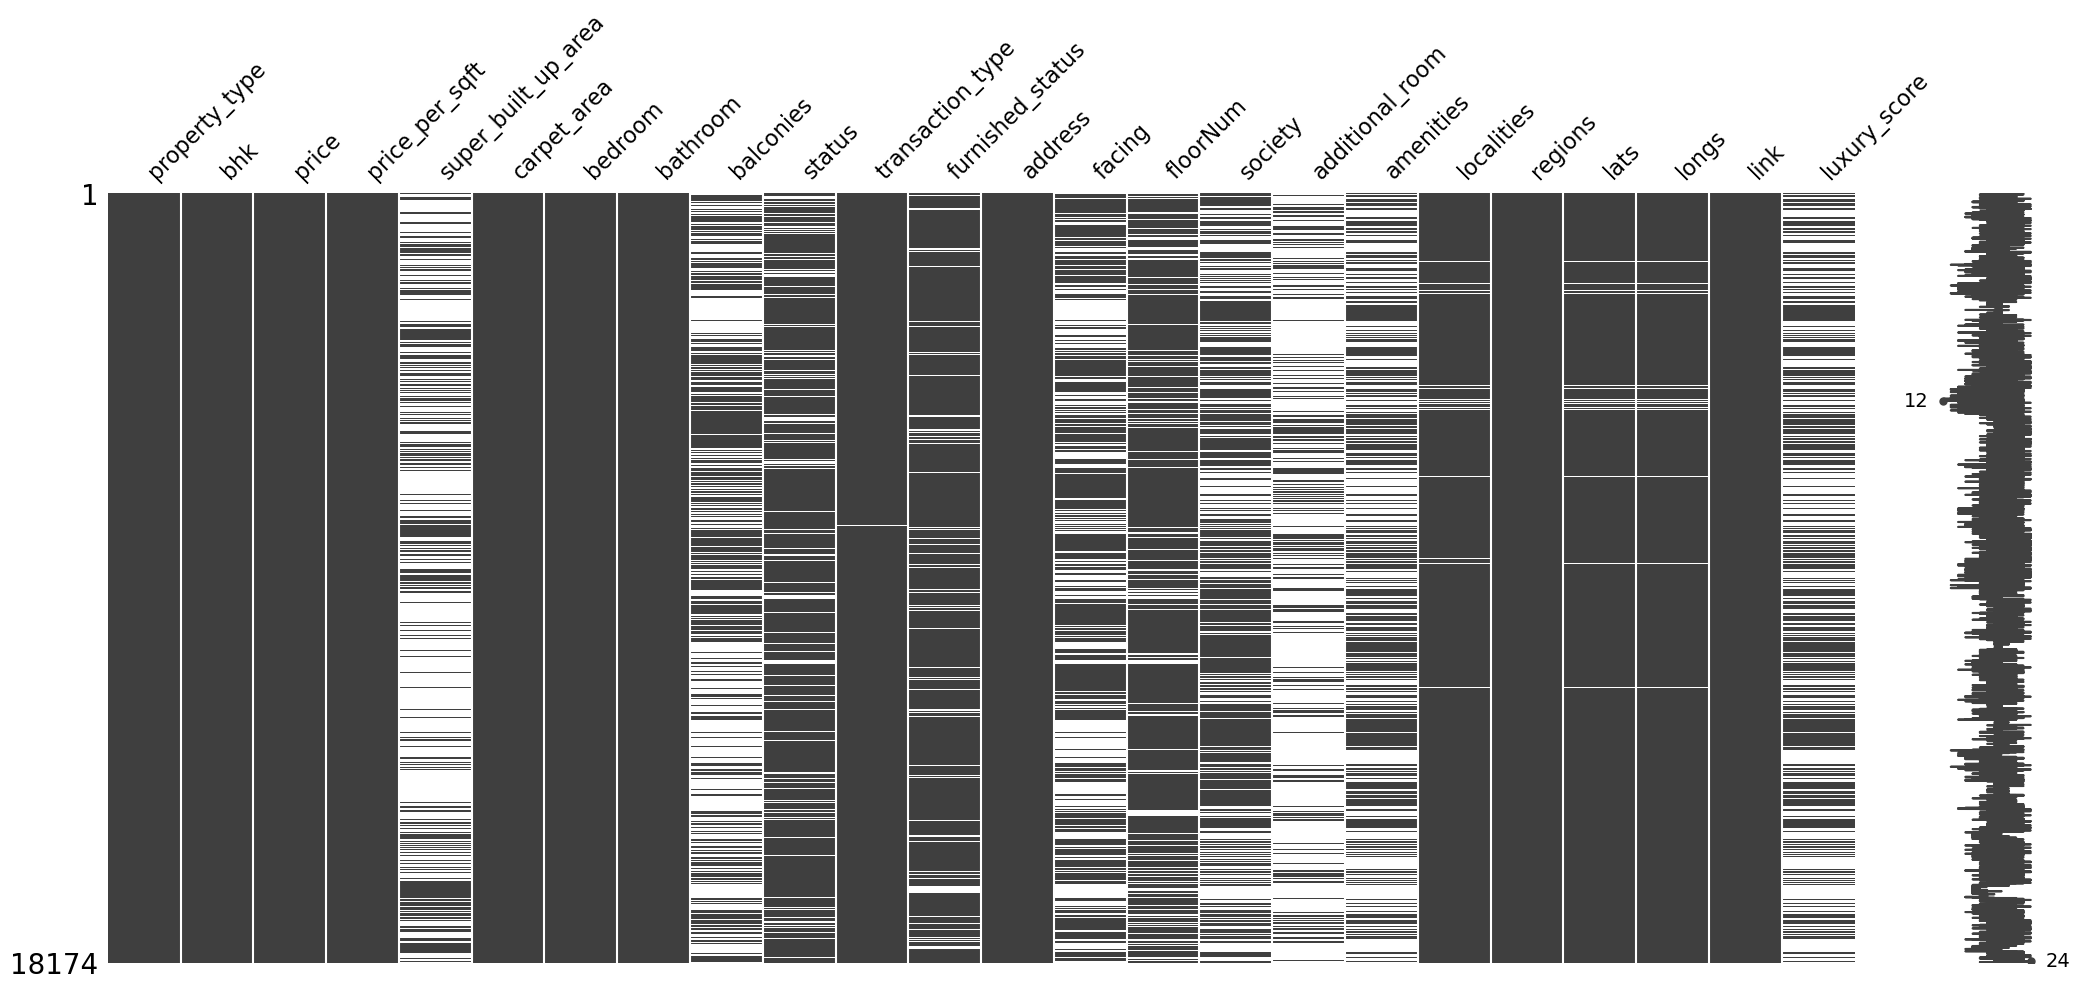

In [10]:
msno.matrix(df)

<Axes: >

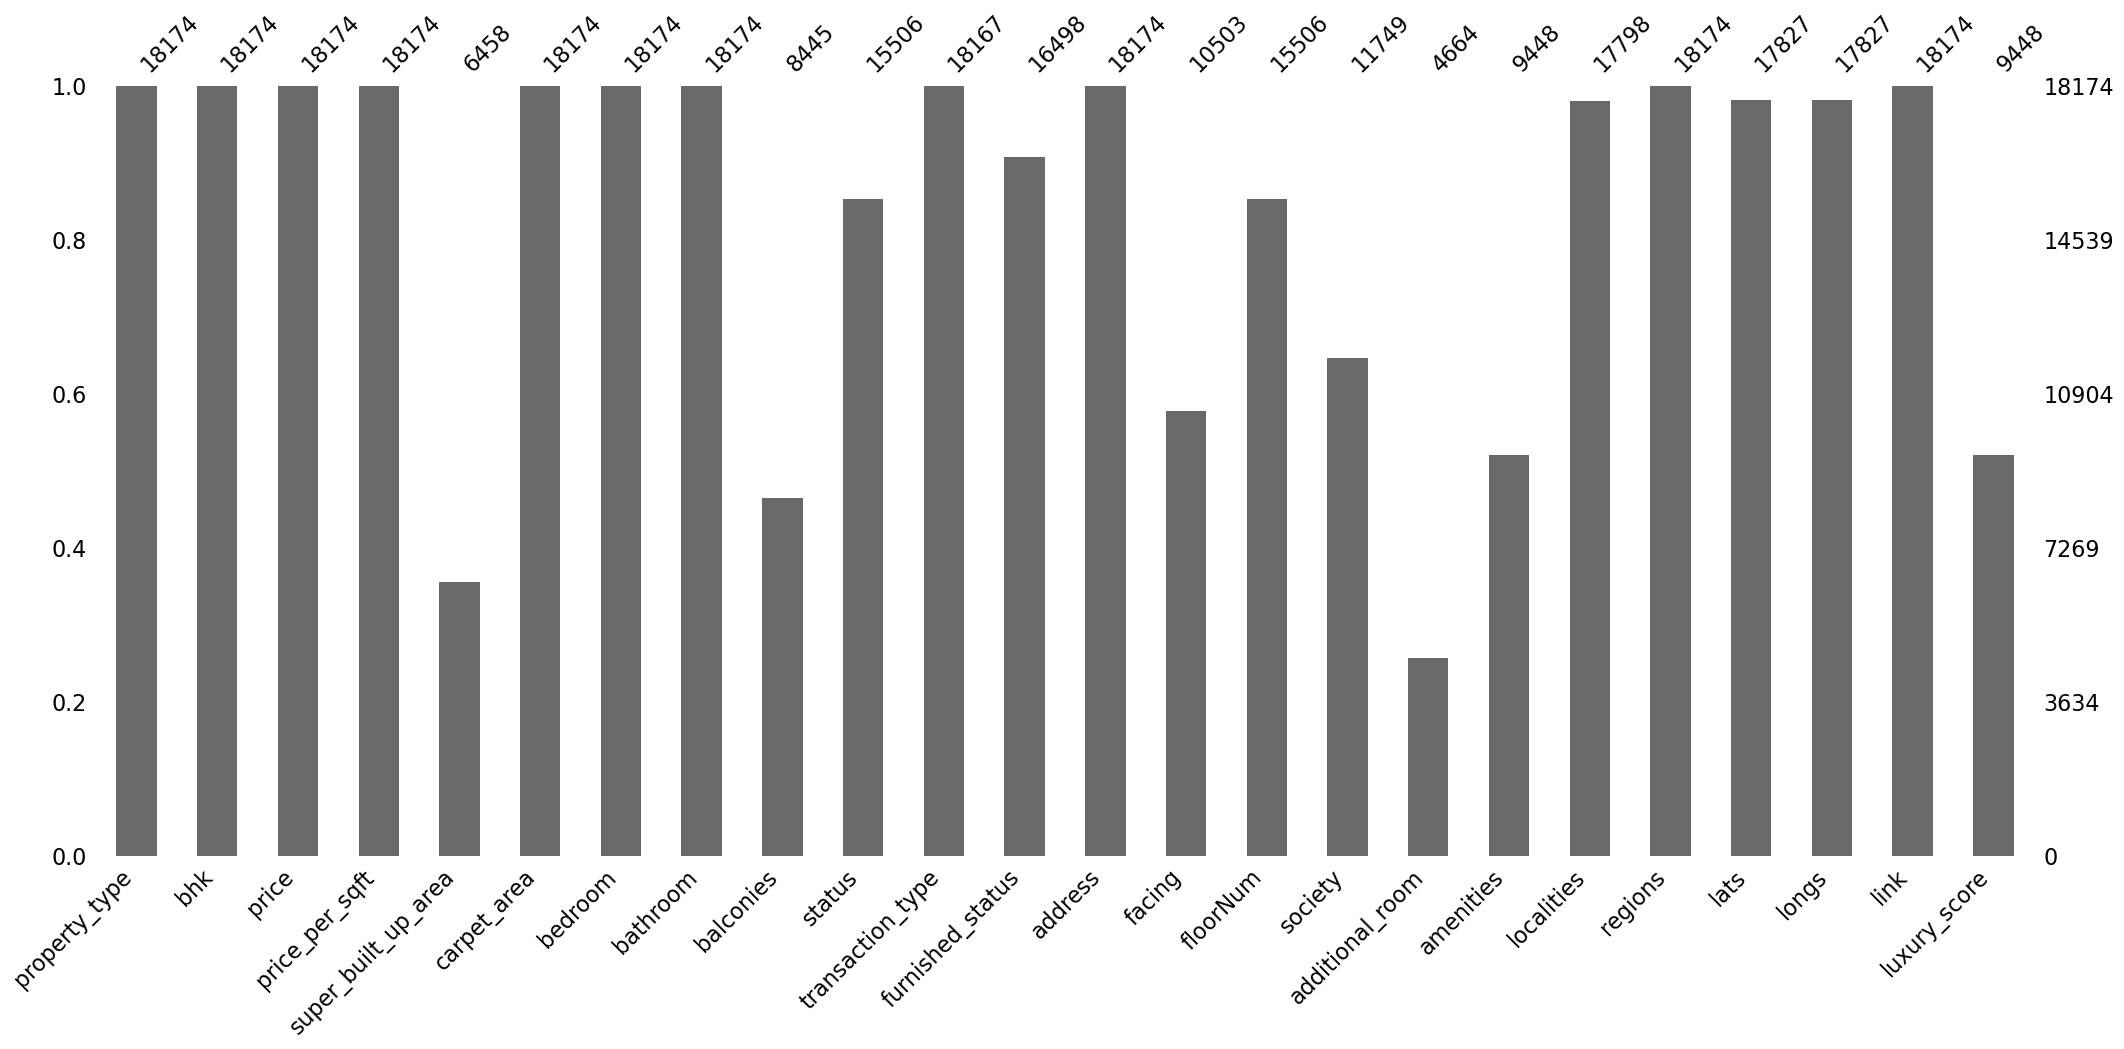

In [11]:
msno.bar(df)

<Axes: >

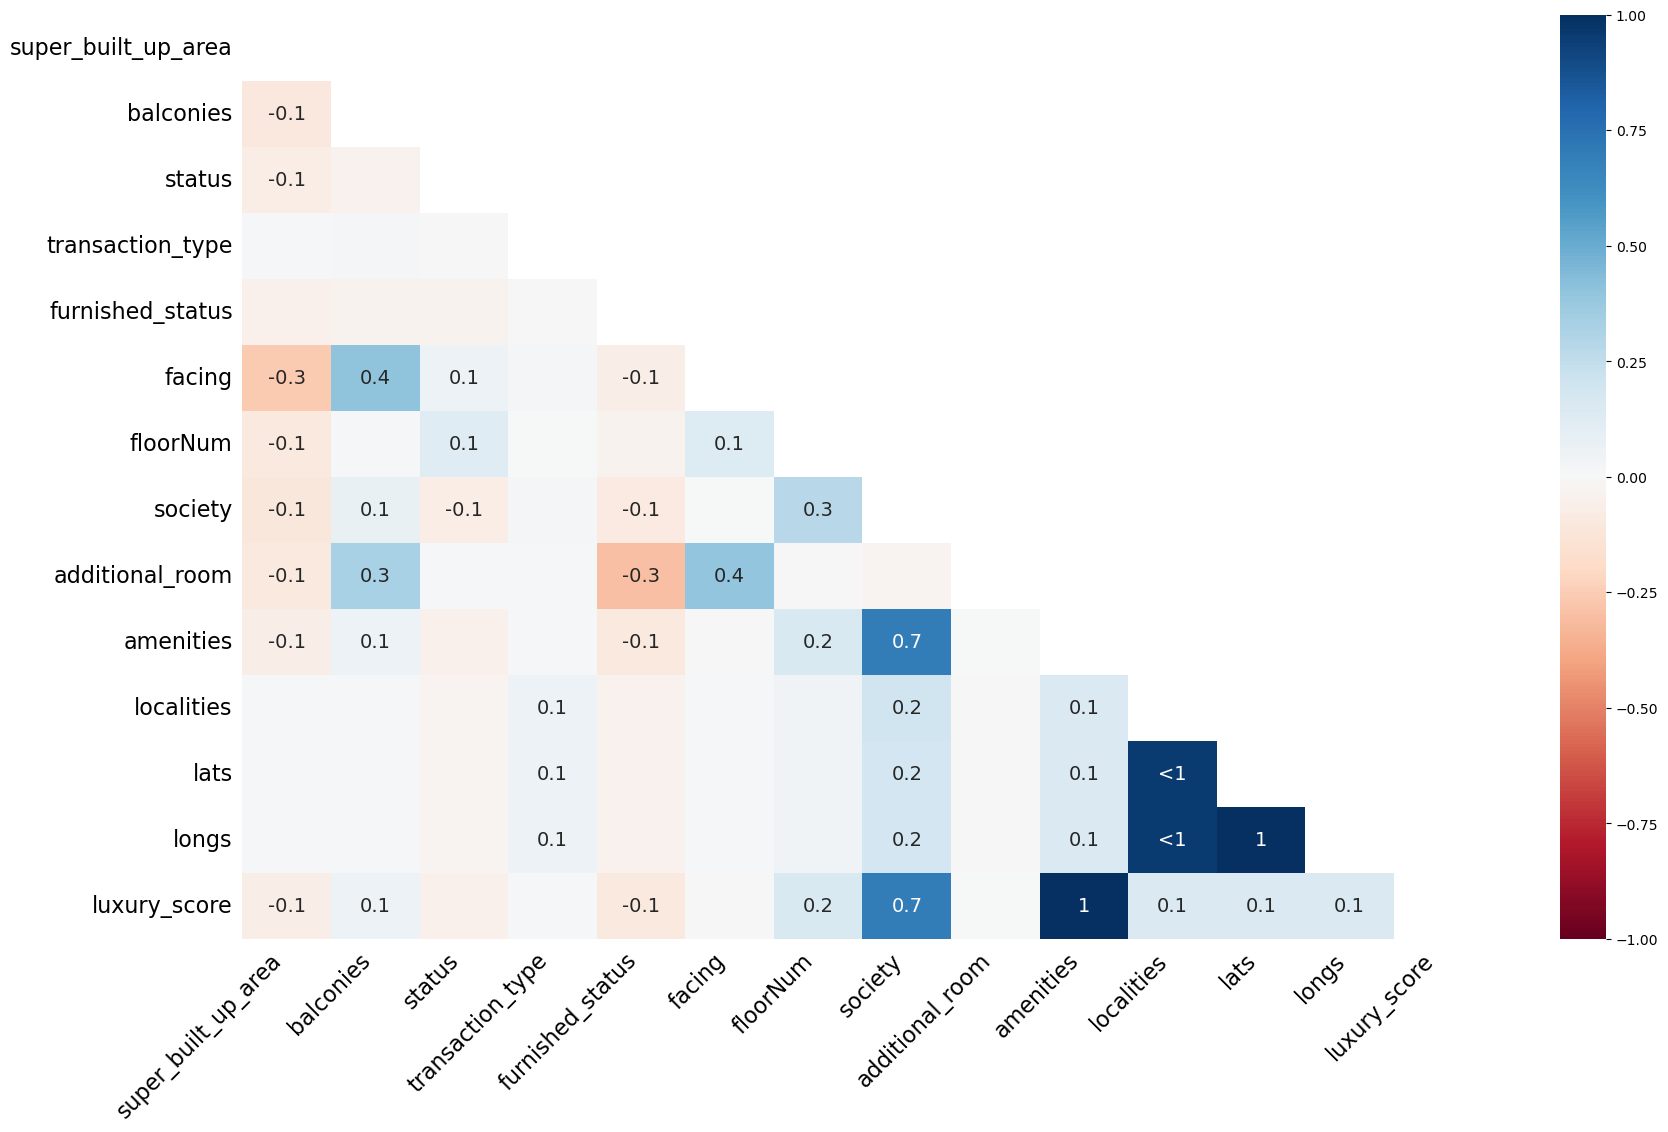

In [12]:
msno.heatmap(df)

<Axes: >

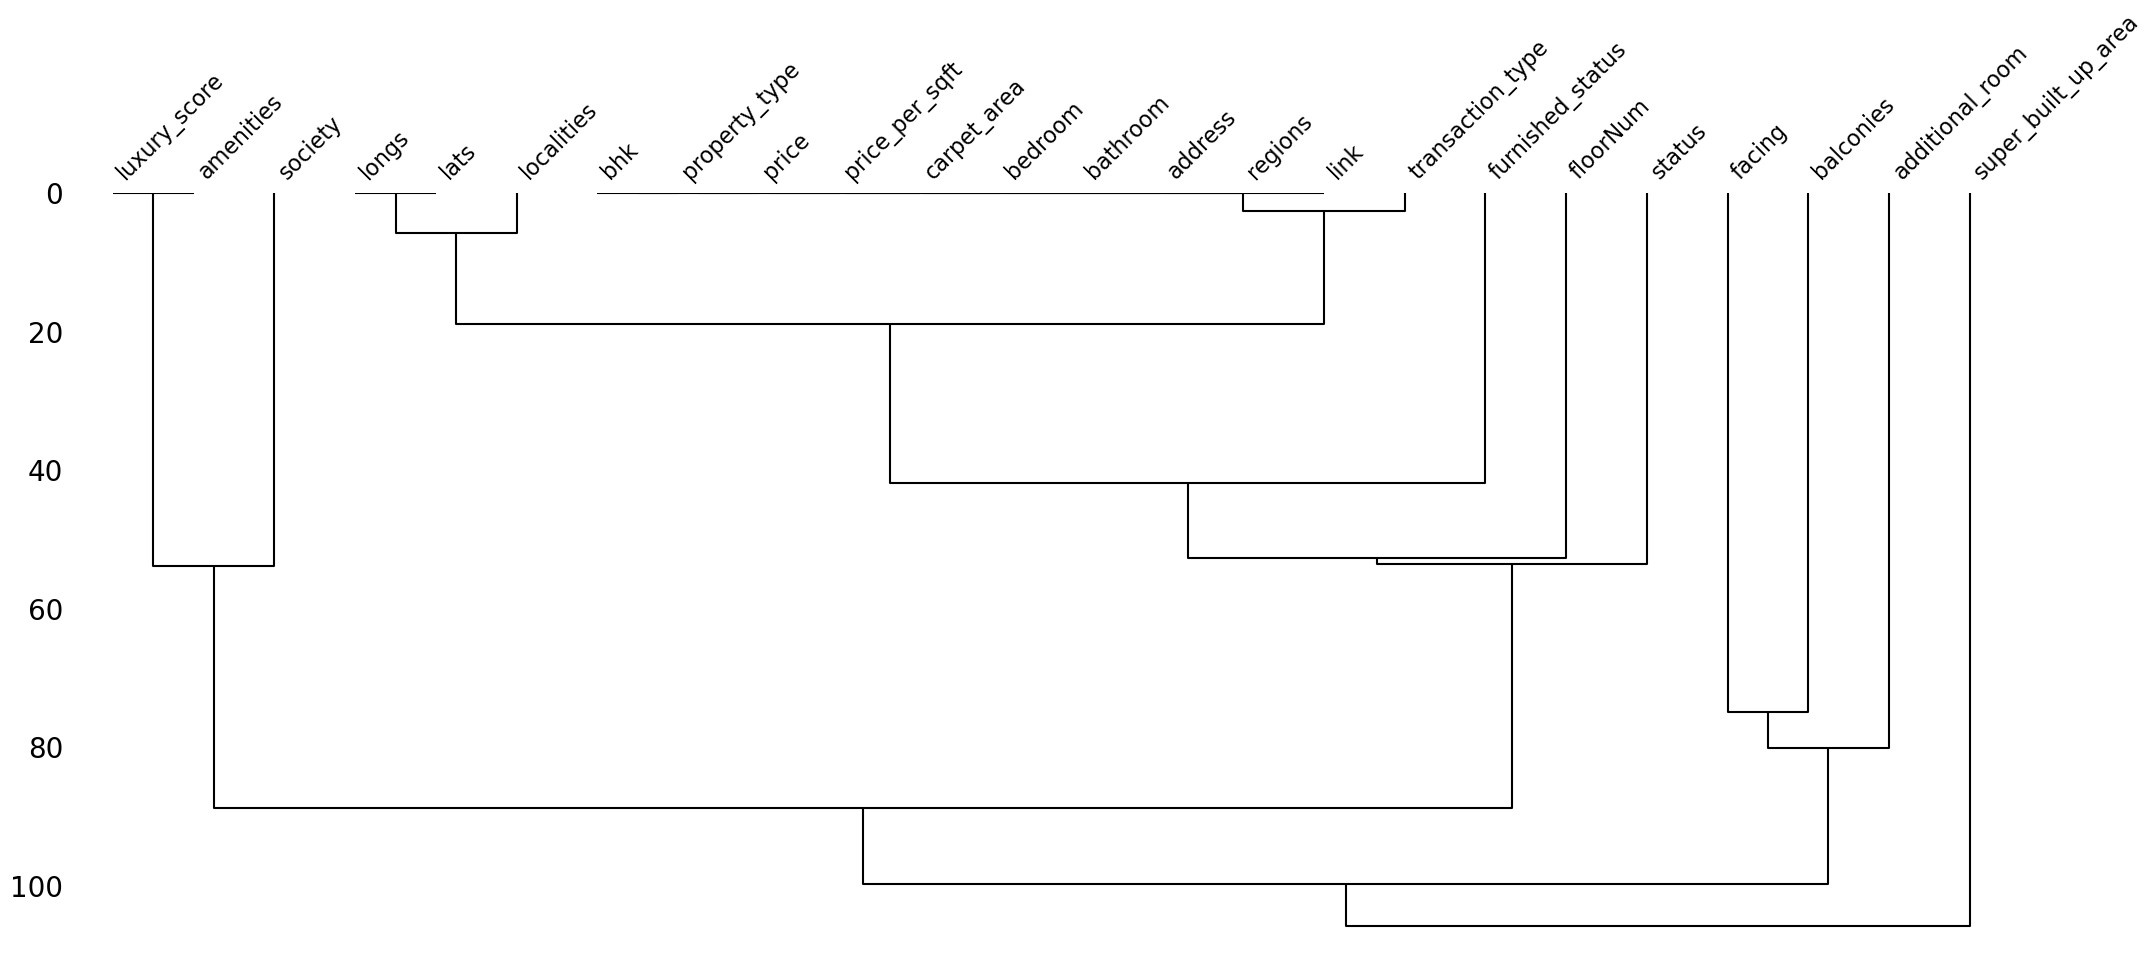

In [18]:
msno.dendrogram(df)

## Balconies

In [11]:
df[~(df['balconies'].isnull())].info()

<class 'pandas.core.frame.DataFrame'>
Index: 8445 entries, 2 to 18173
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        8445 non-null   object 
 1   bhk                  8445 non-null   object 
 2   price                8445 non-null   float64
 3   price_per_sqft       8445 non-null   float64
 4   super_built_up_area  2559 non-null   float64
 5   carpet_area          8445 non-null   float64
 6   bedroom              8445 non-null   float64
 7   bathroom             8445 non-null   float64
 8   balconies            8445 non-null   float64
 9   status               7057 non-null   object 
 10  transaction_type     8445 non-null   object 
 11  furnished_status     7569 non-null   object 
 12  address              8445 non-null   object 
 13  facing               6669 non-null   object 
 14  floorNum             7240 non-null   float64
 15  society              5796 non-null   objec

In [8]:
df[df['bedroom'] > df['balconies']].groupby(['property_type', 'bedroom', 'bathroom', 'balconies'], as_index=False)['price'].median().pivot_table(index='property_type', columns='balconies', values='price', aggfunc='median')

balconies,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
property_type,,,,,,,,
builder-floor,3.4375,3.500,2.50,2.4750,NaN,NaN,3.50,NaN
flat,3.6650,6.100,8.25,3.7000,NaN,NaN,NaN,NaN
penthouse,4.2500,3.925,6.50,NaN,NaN,NaN,NaN,NaN
residential,2.5000,3.100,3.00,3.0875,3.32,1.24,3.75,NaN
villa,2.9900,4.985,9.00,7.7300,NaN,14.25,NaN,3.6


In [9]:
df[df['bedroom'] < df['balconies']].groupby(['property_type', 'bedroom', 'bathroom', 'balconies'], as_index=False)['price'].median().pivot_table(index='property_type', columns='balconies', values='price', aggfunc='median')

balconies,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
property_type,,,,,,,,
builder-floor,1.0000,1.975,4.75,2.250,NaN,NaN,NaN,14.00
flat,1.0525,1.995,2.16,4.385,7.5,4.825,NaN,4.50
penthouse,3.3000,2.350,5.25,3.250,NaN,4.000,16.00,NaN
residential,1.0200,2.865,3.40,1.950,NaN,4.500,3.25,3.00
villa,0.9250,2.000,2.80,10.750,7.9,7.575,NaN,7.49


In [13]:
df[df['bedroom'] == df['balconies']].groupby(['property_type', 'bedroom', 'bathroom', 'balconies'], as_index=False)['price'].median().pivot_table(index='property_type', columns='balconies', values='price', aggfunc='median')

balconies,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0
property_type,,,,,,,,
builder-floor,1.1250,2.5000,4.2750,1.925,NaN,NaN,NaN,14.750
flat,1.1200,2.3250,5.1950,8.410,52.500,NaN,NaN,NaN
penthouse,4.8250,3.1875,4.5000,11.100,NaN,NaN,NaN,NaN
residential,1.5250,2.4250,4.2575,3.225,4.175,45.0,3.125,3.300
villa,1.0675,2.0950,3.9500,5.500,7.250,2.5,NaN,10.755


In [17]:
def balconies_imput(x):
  if x['bedroom'] > x['balconies']:
     
    if x['property_type'] in ['villa' 'flat', 'penthouse']:
      
        if x['price'] < 3.5:
            return 2
        
        elif (x['price'] < 6) and (x['price'] >= 3.5):
            return 3
        
        elif (x['price'] < 8) and (x['price'] >= 6):
            return 4
        
        elif (x['price'] < 10) and (x['price'] >= 8):
            return 5
        elif (x['price'] < 12) and (x['price'] >= 10):
            return 6
        elif (x['price'] < 14) and (x['price'] >= 12):
            return 7
        elif (x['price'] < 16) and (x['price'] >= 14):
            return 8
        else:
            return 9
        
    else:
        
        if x['price'] < 3:
            return 2
        
        elif (x['price'] < 3.2) and (x['price'] >= 3):
            return 3
        
        elif (x['price'] < 3.5) and (x['price'] >= 3.2):
            return 4
        
        elif (x['price'] < 4) and (x['price'] >= 3.5):
            return 5
       
        else:
            return x['balconies']
        
  else:
        if x['property_type'] in ['villa', 'penthouse']:
          if x['price'] < 3.5:
              return 2
          elif (x['price'] < 6) and (x['price'] >= 3.5):
              return 3
          elif (x['price'] < 8) and (x['price'] >= 6):
              return 4
          elif (x['price'] < 12) and (x['price'] >= 8):
              return 5
          elif (x['price'] < 16) and (x['price'] >= 12):
              return 6
          else:
              return x['balconies']
        else:
            if x['price'] <= 1.5:
                return 2
            elif (x['price'] <= 3) and (x['price'] > 1.5):
                return 3
            elif (x['price'] < 5) and (x['price'] >= 3):
                return 4
            elif (x['price'] < 8) and (x['price'] > 5):
                return 5
            else:
                return x['balconies']
            
   
            
        

In [28]:
bal = df[df['balconies'].isnull()]

In [29]:
bal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9729 entries, 0 to 18172
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        9729 non-null   object 
 1   bhk                  9729 non-null   object 
 2   price                9729 non-null   float64
 3   price_per_sqft       9729 non-null   float64
 4   super_built_up_area  3899 non-null   float64
 5   carpet_area          9729 non-null   float64
 6   bedroom              9729 non-null   float64
 7   bathroom             9729 non-null   float64
 8   balconies            0 non-null      float64
 9   status               8449 non-null   object 
 10  transaction_type     9722 non-null   object 
 11  furnished_status     8929 non-null   object 
 12  address              9729 non-null   object 
 13  facing               3834 non-null   object 
 14  floorNum             8266 non-null   float64
 15  society              5953 non-null   objec

In [24]:
bal['balconies'] = bal.apply(lambda x: balconies_imput(x),axis=1 )

C:\Users\soura\AppData\Local\Temp\ipykernel_22256\3473255014.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bal['balconies'] = bal.apply(lambda x: balconies_imput(x),axis=1 )


In [25]:
df['balconies_imputed'] = df['balconies']

In [27]:
df.loc[bal.index, 'balconies_imputed'] = bal['balconies']

In [16]:
df[df['bedroom'] == df['balconies']].groupby(['property_type', 'bedroom', 'bathroom', 'balconies'], as_index=False)['price'].median().pivot_table(index='property_type', columns='balconies', values='price', aggfunc='median')

balconies,2.0,3.0,4.0,5.0,6.0,7.0,8.0,10.0
property_type,,,,,,,,
builder-floor,1.1250,2.5000,4.2750,1.925,NaN,NaN,NaN,14.750
flat,1.1200,2.3250,5.1950,8.410,52.500,NaN,NaN,NaN
penthouse,4.8250,3.1875,4.5000,11.100,NaN,NaN,NaN,NaN
residential,1.5250,2.4250,4.2575,3.225,4.175,45.0,3.125,3.300
villa,1.0675,2.0950,3.9500,5.500,7.250,2.5,NaN,10.755


In [60]:
df[['bedroom', 'bathroom', 'balconies', 'price']].corr()

,bedroom,bathroom,balconies,price
bedroom,1.000000,0.860697,0.393395,0.410417
bathroom,0.860697,1.000000,0.408488,0.488775
balconies,0.393395,0.408488,1.000000,0.230683
price,0.410417,0.488775,0.230683,1.000000


In [43]:
#using itreative imputer to fill balconies

from sklearn.impute import IterativeImputer
iter_imputer = IterativeImputer(max_iter=10, random_state=42)


In [46]:
df_imputed = pd.DataFrame(iter_imputer.fit_transform(df[['bedroom', 'bathroom', 'balconies', 'price']]), columns=['bedroom', 'bathroom', 'balconies', 'price'])

In [50]:
df['balconies_iter'] = df_imputed['balconies'].round()

In [51]:
df

,property_type,bhk,price,price_per_sqft,super_built_up_area,carpet_area,bedroom,bathroom,balconies,status,...,additional_room,amenities,localities,regions,lats,longs,link,luxury_score,balconies_imputed,balconies_iter
0,flat,3-bhk-1377-sq-ft-multistorey-apartment-for-sal...,0.52,4333.0,NaN,1200.0,3.0,2.0,NaN,ready to move,...,NaN,NaN,electronic city phase 2,bangalore,12.839136,77.698975,https://www.magicbricks.com/propertyDetails/3-...,NaN,2.0,3.0
1,flat,3-bhk-1608-sq-ft-multistorey-apartment-for-sal...,1.64,12753.0,1608.0,1286.0,3.0,3.0,NaN,under construction,...,NaN,"['pool with temperature control', 'golf course...",sarjapur road,bangalore,12.912350,77.680996,https://www.magicbricks.com/propertyDetails/3-...,26.85,3.0,3.0
2,flat,2-bhk-1417-sq-ft-multistorey-apartment-for-sal...,1.41,14915.0,NaN,952.0,2.0,2.0,2.0,ready to move,...,NaN,NaN,begur hulimavu road,bangalore,12.865125,77.621071,https://www.magicbricks.com/propertyDetails/2-...,NaN,2.0,2.0
3,flat,3-bhk-1410-sq-ft-multistorey-apartment-for-sal...,0.67,5940.0,1410.0,1128.0,3.0,2.0,NaN,ready to move,...,NaN,NaN,electronics city phase 1,bangalore,12.833951,77.675366,https://www.magicbricks.com/propertyDetails/3-...,NaN,2.0,3.0
4,villa,3-bhk-1200-sq-ft-villa-for-sale-chandapura-in-...,1.05,10938.0,1200.0,960.0,3.0,3.0,2.0,ready to move,...,1 study room,NaN,chandapura,bangalore,12.798481,77.713809,https://www.magicbricks.com/propertyDetails/3-...,NaN,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18169,flat,5-bhk-2956-sq-ft-multistorey-apartment-for-sal...,5.85,24736.0,2956.0,2365.0,5.0,5.0,4.0,ready to move,...,NaN,"['power back up', 'kids play area', 'cafeteria...",whitefield,bangalore,12.968048,77.739097,https://www.magicbricks.com/propertyDetails/5-...,16.20,4.0,4.0
18170,flat,3-bhk-1565-sq-ft-multistorey-apartment-for-sal...,1.48,10571.0,NaN,1400.0,3.0,3.0,NaN,ready to move,...,NaN,NaN,panathur,bangalore,12.934362,77.704041,https://www.magicbricks.com/propertyDetails/3-...,NaN,2.0,3.0
18171,residential,4-bhk-2400-sq-ft-residential-house-for-sale-as...,1.60,8333.0,2400.0,1920.0,4.0,4.0,2.0,ready to move,...,1 study room,NaN,ashirvad colony,bangalore,13.026572,77.657832,https://www.magicbricks.com/propertyDetails/4-...,NaN,2.0,2.0
18172,villa,4-bhk-2750-sq-ft-villa-for-sale-budigere-cross...,1.99,7236.0,NaN,2750.0,4.0,5.0,NaN,ready to move,...,1 store room,NaN,budigere cross,bangalore,13.046666,77.750076,https://www.magicbricks.com/propertyDetails/4-...,NaN,2.0,3.0


<Axes: xlabel='balconies_iter', ylabel='Count'>

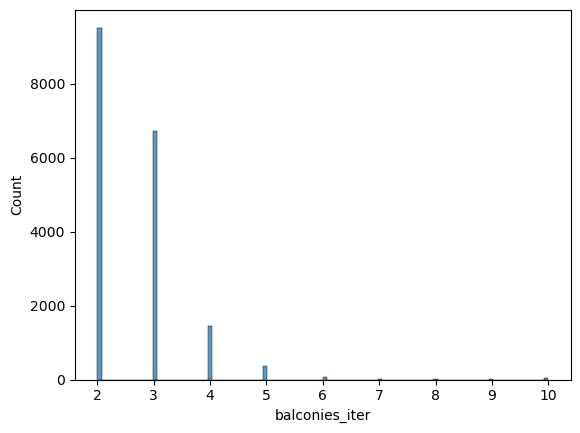

In [55]:
sns.histplot(df['balconies_iter'])

<Axes: xlabel='balconies', ylabel='Count'>

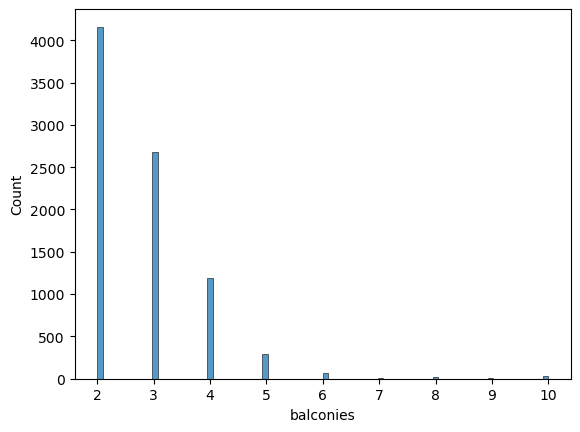

In [56]:
sns.histplot(df['balconies'])

<Axes: xlabel='balconies_imputed', ylabel='Count'>

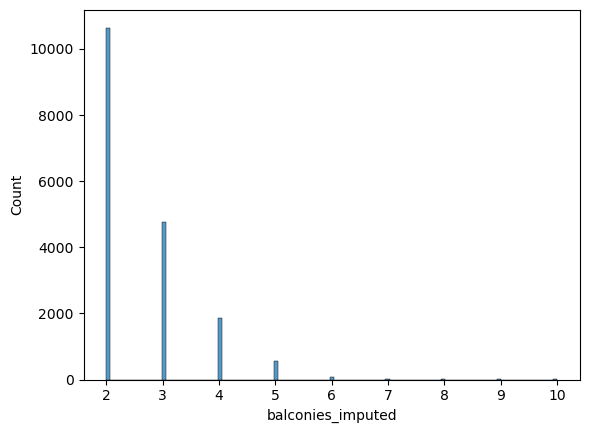

In [57]:
sns.histplot(df['balconies_imputed'])

In [59]:
df['balconies_imputed'].value_counts(), df['balconies_iter'].value_counts()

(balconies_imputed
 2.0     10645
 3.0      4778
 4.0      1853
 5.0       562
 6.0        68
 10.0       30
 8.0        20
 7.0        10
 9.0         3
 Name: count, dtype: int64,
 balconies_iter
 2.0     9512
 3.0     6712
 4.0     1455
 5.0      369
 6.0       63
 10.0      30
 8.0       20
 7.0       10
 9.0        3
 Name: count, dtype: int64)

## additional_room

<Axes: xlabel='additional_room', ylabel='Count'>

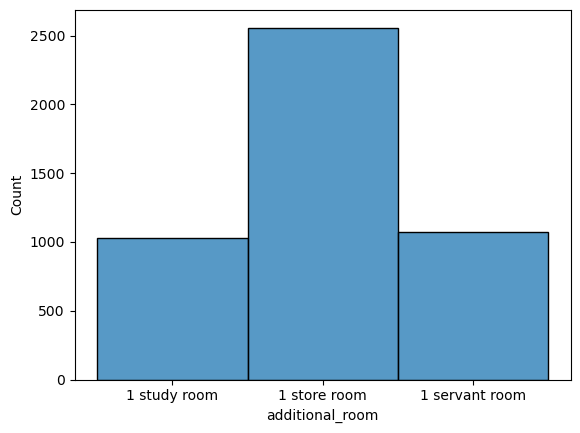

In [64]:
sns.histplot(df['additional_room'])

In [67]:
df['additional_room'] = df['additional_room'].apply(lambda x:  1 if x in ['1 study room','1 store room','1 servant room'] else x)

In [68]:
df['additional_room'].fillna(0, inplace=True)

C:\Users\soura\AppData\Local\Temp\ipykernel_22256\1127667365.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['additional_room'].fillna(0, inplace=True)


In [73]:
df.isnull().sum(
    
)

property_type              0
bhk                        0
price                      0
price_per_sqft             0
super_built_up_area    11716
carpet_area                0
bedroom                    0
bathroom                   0
balconies               9729
status                  2668
transaction_type           0
furnished_status        1676
address                    0
facing                  7671
floorNum                2668
society                 6425
additional_room            0
amenities               8726
localities               376
regions                    0
lats                     347
longs                    347
link                       0
luxury_score            8726
balconies_imputed        205
balconies_iter             0
dtype: int64

## Transaction type

In [72]:
df['transaction_type'].fillna('other', inplace=True)

## furnished_status

In [74]:
df[df['furnished_status'].isnull()]

,property_type,bhk,price,price_per_sqft,super_built_up_area,carpet_area,bedroom,bathroom,balconies,status,...,additional_room,amenities,localities,regions,lats,longs,link,luxury_score,balconies_imputed,balconies_iter
8,flat,2-bhk-1290-sq-ft-multistorey-apartment-for-sal...,1.32,18848.0,NaN,703.0,2.0,2.0,2.0,ready to move,...,1.0,"['lift', 'club house', 'security', 'intercom f...",kanakapura road,bangalore,12.886870,77.551370,https://www.magicbricks.com/propertyDetails/2-...,7.18,2.0,2.0
47,flat,4-bhk-4893-sq-ft-multistorey-apartment-for-sal...,7.65,21857.0,NaN,3500.0,4.0,5.0,NaN,ready to move,...,1.0,"['power back up', 'waste disposal', 'internet/...",koramangala,bangalore,12.928728,77.626569,https://www.magicbricks.com/propertyDetails/4-...,25.93,5.0,3.0
48,flat,4-bhk-3705-sq-ft-multistorey-apartment-for-sal...,6.60,32813.0,NaN,2012.0,4.0,3.0,3.0,ready to move,...,1.0,"['power back up', 'earth quake resistant', 'ma...",koramangala,bangalore,12.928728,77.626569,https://www.magicbricks.com/propertyDetails/4-...,32.64,3.0,3.0
55,flat,4-bhk-3010-sq-ft-multistorey-apartment-for-sal...,3.80,13103.0,NaN,2900.0,4.0,4.0,3.0,ready to move,...,1.0,"['ac in each room', 'power back up', 'internet...",bannerghatta,bangalore,12.870527,77.593325,https://www.magicbricks.com/propertyDetails/4-...,24.07,3.0,3.0
59,flat,3-bhk-1082-sq-ft-multistorey-apartment-for-sal...,0.74,6865.0,NaN,1082.0,3.0,3.0,2.0,ready to move,...,1.0,"['power back up', 'lift', 'rain water harvesti...",kengeri,bangalore,12.887362,77.468627,https://www.magicbricks.com/propertyDetails/3-...,8.56,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18076,flat,2-bhk-1220-sq-ft-multistorey-apartment-for-sal...,0.80,8197.0,1220.0,976.0,2.0,2.0,2.0,ready to move,...,1.0,"['power back up', 'lift', 'rain water harvesti...",whitefield,bangalore,12.983486,77.753857,https://www.magicbricks.com/propertyDetails/2-...,6.25,2.0,2.0
18090,flat,4-bhk-2296-sq-ft-multistorey-apartment-for-sal...,1.80,9799.0,2296.0,1837.0,4.0,3.0,2.0,ready to move,...,1.0,"['power back up', 'lift', 'rain water harvesti...",kalkere,bangalore,13.032045,77.661594,https://www.magicbricks.com/propertyDetails/4-...,6.48,2.0,2.0
18098,flat,4-bhk-2021-sq-ft-multistorey-apartment-for-sal...,2.65,16388.0,2021.0,1617.0,4.0,3.0,2.0,ready to move,...,1.0,"['lift', 'multipurpose courts', 'aerobics room...",whitefield,bangalore,12.990494,77.714203,https://www.magicbricks.com/propertyDetails/4-...,24.31,2.0,2.0
18102,builder-floor,2-bhk-900-sq-ft-builder-floor-apartment-for-sa...,0.50,5714.0,NaN,875.0,2.0,2.0,NaN,ready to move,...,1.0,NaN,kalyan nagar,bangalore,13.026050,77.640757,https://www.magicbricks.com/propertyDetails/2-...,NaN,2.0,2.0


<Axes: xlabel='furnished_status', ylabel='Count'>

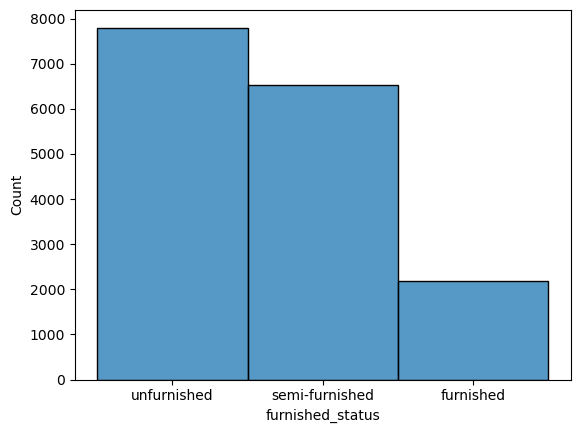

In [75]:
sns.histplot(df['furnished_status'])

In [78]:
df['furnished_status'].fillna('unfurnished')

0           unfurnished
1           unfurnished
2           unfurnished
3           unfurnished
4           unfurnished
              ...      
18169    semi-furnished
18170    semi-furnished
18171    semi-furnished
18172       unfurnished
18173       unfurnished
Name: furnished_status, Length: 18174, dtype: object

## floorNum

In [87]:
iter_imputer = IterativeImputer(max_iter=10, random_state=42)

In [88]:
df_imputed = pd.DataFrame(iter_imputer.fit_transform(df[['bedroom', 'bathroom', 'balconies', 'price','additional_room', 'floorNum']]), columns=['bedroom', 'bathroom', 'balconies', 'price','additional_room','floorNum'])

<Axes: xlabel='floorNum', ylabel='Count'>

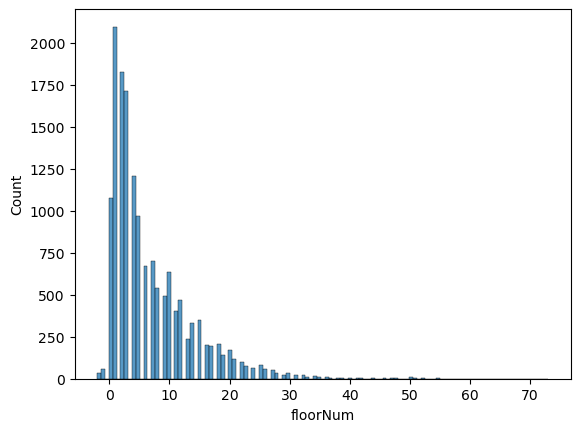

In [84]:
sns.histplot(df['floorNum'])

<Axes: xlabel='floorNum', ylabel='Count'>

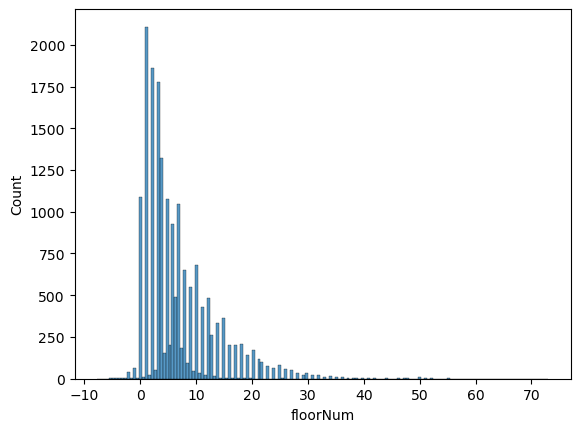

In [89]:
sns.histplot(df_imputed['floorNum'])

In [90]:
df['floorNum_iter'] = df_imputed['floorNum']

In [99]:
df.isnull().sum()

property_type                   0
bhk                             0
price                           0
price_per_sqft                  0
super_built_up_area         11716
carpet_area                     0
bedroom                         0
bathroom                        0
balconies                    9729
status                       2668
transaction_type                0
furnished_status             1676
address                         0
facing                       7671
floorNum                     2668
society                      6425
additional_room                 0
amenities                    8726
localities                    376
regions                         0
lats                          347
longs                         347
link                            0
luxury_score                 8726
balconies_imputed             205
balconies_iter                  0
floorNum_iter                   0
furnished_status_imputed        0
dtype: int64

## luxury_score

In [92]:
df['furnished_status_imputed'] = df['furnished_status'].fillna('unfurnished')

In [93]:
df['furnished_status_imputed'].value_counts()

furnished_status_imputed
unfurnished       9475
semi-furnished    6518
furnished         2181
Name: count, dtype: int64

In [94]:
def furnished_status_to_num(x):
    if x == 'furnished':
       return 2
    elif x == 'semi-furnished':
        return 1
    else:
        return 0

df['furnished_status_imputed'] = df['furnished_status_imputed'].apply(furnished_status_to_num)

In [97]:
iter_imputer = IterativeImputer(max_iter=10, random_state=42)

In [ ]:
df_imputed = pd.DataFrame(iter_imputer.fit_transform(df[['bedroom', 'bathroom', 'balconies', 'price','additional_room', 'floorNum']]), columns=['bedroom', 'bathroom', 'balconies', 'price','additional_room','floorNum'])

In [100]:
df_imputed = pd.DataFrame(iter_imputer.fit_transform(df[['bedroom', 'bathroom', 'balconies', 'price','additional_room', 'floorNum', 'furnished_status_imputed', 'luxury_score']]),
                          columns=['bedroom', 'bathroom', 'balconies', 'price','additional_room', 'floorNum', 'furnished_status_imputed', 'luxury_score'])

<Axes: xlabel='luxury_score', ylabel='Count'>

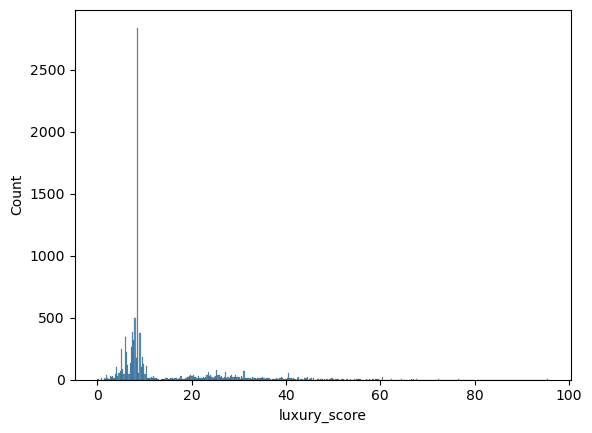

In [101]:
sns.histplot(df['luxury_score'])

<Axes: xlabel='luxury_score', ylabel='Count'>

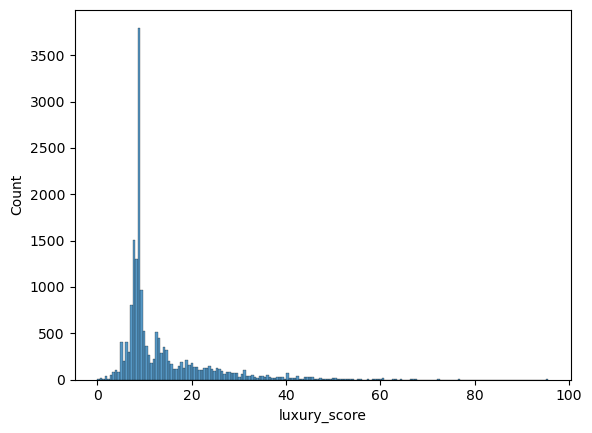

In [102]:
sns.histplot(df_imputed['luxury_score'])

In [105]:
df['luxury_score_iter'] = df_imputed['luxury_score'].round()

In [106]:
df.to_csv('imputed_data.csv', index=False)